<a href="https://colab.research.google.com/github/Saifullah785/Machine_Learning_Projects/blob/main/Project-10-Abalone-Age-Prediction-Using-Machine-Learning/Abalone_Age_prediction_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Abalone-Age-Prediction-Using-Machine-Learning**


In [33]:
# Import the necessary libraries: numpy for numerical operations and pandas for data manipulation.
import numpy as np
import pandas as pd

In [34]:
# Load the abalone dataset from a CSV file into a pandas DataFrame.
abalone = pd.read_csv('/content/abalone.csv')

In [35]:
# Display the first 5 rows of the DataFrame to get a glimpse of the data structure and contents.
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# **Ask Six Questions before Moving forward**

In [36]:
# Check the dimensions of the DataFrame (number of rows and columns).
abalone.shape

(4177, 9)

In [37]:
# Get a concise summary of the DataFrame, including the data types of each column and the number of non-null values.
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [38]:
# Check for missing values in each column of the DataFrame and sum them up.
abalone.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Whole weight,0
Shucked weight,0
Viscera weight,0
Shell weight,0
Rings,0


In [39]:
# Check for duplicate rows in the DataFrame and sum them up.
abalone.duplicated().sum()

np.int64(0)

In [40]:
# Generate descriptive statistics of the numerical columns in the DataFrame, such as mean, standard deviation, min, max, and quartiles.
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# **Encoding**

In [41]:
# Get the counts of each unique value in the 'Sex' column to understand the distribution of sexes in the dataset.
abalone['Sex'].value_counts()

,count
Sex,
M,1528
I,1342
F,1307


In [42]:
# Map the categorical 'Sex' column to numerical values for model training.
abalone['Sex'] = abalone['Sex'].map({'M':0, 'F':1, 'I':2})

In [43]:
# Verify the mapping by checking the value counts of the 'Sex' column after encoding.
abalone['Sex'].value_counts()

,count
Sex,
0,1528
2,1342
1,1307


# **EDA (Exploratory data Analysis)**

In [44]:
# Calculate the correlation matrix of the DataFrame to understand the relationships between different features.
corr = abalone.corr()
corr

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.448765,-0.458245,-0.417928,-0.461238,-0.440927,-0.454658,-0.445549,-0.351822
Length,-0.448765,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.458245,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.417928,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.461238,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.440927,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.454658,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.445549,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.351822,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<Axes: >

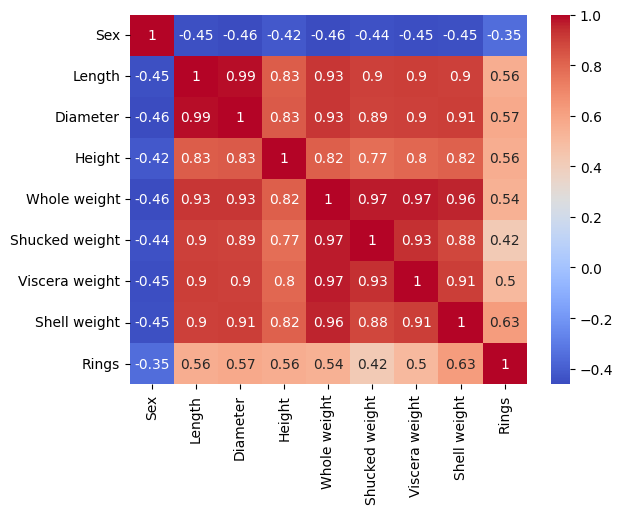

In [45]:
# Import the seaborn library for data visualization.
import seaborn as sns
# Create a heatmap of the correlation matrix to visually represent the correlations between features.
sns.heatmap(corr, annot=True, cmap='coolwarm',cbar=True)

# **Distribution of target variable (age)**

<Axes: xlabel='Rings', ylabel='Count'>

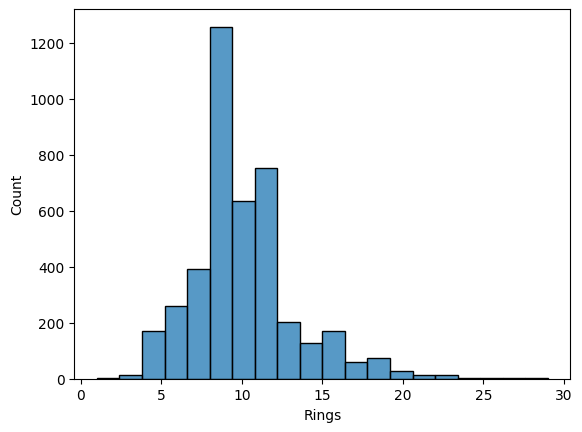

In [46]:
# Create a histogram of the 'Rings' column to visualize the distribution of the target variable (age).
sns.histplot(abalone['Rings'],bins=20)

In [47]:
# Get the counts of each unique value in the 'Rings' column to see the frequency of each age group.
abalone['Rings'].value_counts()

,count
Rings,
9,689
10,634
8,568
11,487
7,391
12,267
6,259
13,203
14,126


# **Scatter plot of length vs age**

<Axes: xlabel='Length', ylabel='Rings'>

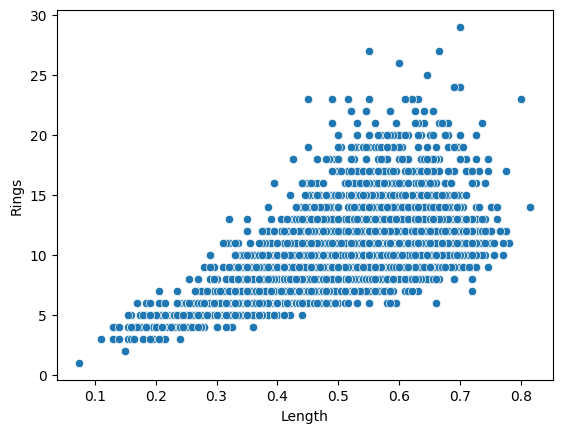

In [48]:
# Create a scatter plot to visualize the relationship between 'Length' and 'Rings' (age).
sns.scatterplot(x='Length',y='Rings',data=abalone)

# **Train Test Split**

In [49]:
# Separate the features (X) and the target variable (y) for model training.
X = abalone.drop('Rings',axis=1)
y = abalone['Rings']

In [50]:
# Import the train_test_split function from scikit-learn to split the data into training and testing sets.
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets (80% for training, 20% for testing) with a fixed random state for reproducibility.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# **Standarization the data**

In [51]:
# Import StandardScaler from scikit-learn to standardize the data.
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object.
sc = StandardScaler()
# Fit the StandardScaler on the training data and transform it.
X_train_scaled = sc.fit_transform(X_train)

In [52]:
# Transform the test data using the same StandardScaler fitted on the training data.
X_test_scaled = sc.transform(X_test)

In [53]:
# Display the scaled test data.
X_test_scaled

array([[-1.15518338,  0.67189513,  0.47107108, ...,  0.27104784,
         1.10272193,  0.60976664],
       [-1.15518338,  0.54597132,  0.31905249, ...,  0.11857068,
         0.31224199,  0.03801081],
       [ 0.05278772,  0.29412372,  0.36972535, ..., -0.24916836,
         0.39905771,  0.68123611],
       ...,
       [ 1.26075882,  0.16819992,  0.21770676, ..., -0.03614879,
        -0.20865231, -0.22642626],
       [ 1.26075882, -0.50339368, -0.5423862 , ..., -0.47339947,
        -0.81636232, -0.39795301],
       [ 1.26075882, -1.34288568, -1.35315201, ..., -1.17748518,
        -1.30984112, -1.17697032]])

In [54]:
# Display the scaled test data again.
X_test_scaled

array([[-1.15518338,  0.67189513,  0.47107108, ...,  0.27104784,
         1.10272193,  0.60976664],
       [-1.15518338,  0.54597132,  0.31905249, ...,  0.11857068,
         0.31224199,  0.03801081],
       [ 0.05278772,  0.29412372,  0.36972535, ..., -0.24916836,
         0.39905771,  0.68123611],
       ...,
       [ 1.26075882,  0.16819992,  0.21770676, ..., -0.03614879,
        -0.20865231, -0.22642626],
       [ 1.26075882, -0.50339368, -0.5423862 , ..., -0.47339947,
        -0.81636232, -0.39795301],
       [ 1.26075882, -1.34288568, -1.35315201, ..., -1.17748518,
        -1.30984112, -1.17697032]])

# **Training Models**

In [55]:
# Import various regression models and evaluation metrics from scikit-learn.
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [56]:
# Define a list of regression models to train and compare their performance.
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42))
]

In [57]:
# Iterate through each model in the 'models' list.
for name, model in models:

  # Train the current model on the training data.
  model.fit(X_train, y_train)
  # Make predictions on the test data.
  y_pred = model.predict(X_test)
  # Calculate the R-squared score to evaluate the model's performance.
  r2 = r2_score(y_test, y_pred)
  # Calculate the Mean Squared Error (MSE) to evaluate the model's performance.
  mse = mean_squared_error(y_test, y_pred)
  # Print the model name and its calculated MSE and R2 scores.
  print(f'{name}: MSE - {mse:.2f}, R2 - {r2:.2f}')

Linear Regression: MSE - 4.95, R2 - 0.54
Ridge Regression: MSE - 4.99, R2 - 0.54
Lasso Regression: MSE - 10.83, R2 - -0.00
Decision Tree: MSE - 9.02, R2 - 0.17
Random Forest: MSE - 5.07, R2 - 0.53


In [58]:
# Comments explaining the meaning of MSE and R2 score.
# The MSE represents the average squared difference between the predicted and actual values, and a lower MSE indicates better performance.
# The R2 score represents the proportion of variance in the target variable that is predictable from the independent variables, and a higher R2 score indicates better performance.

# **Chosen Model**

In [59]:
# Choose the Decision Tree Regressor as the chosen model (based on previous evaluation).
dtr = DecisionTreeRegressor()
# Train the Decision Tree Regressor model on the training data.
dtr.fit(X_train, y_train)
# Make predictions on the test data using the trained Decision Tree model.
y_pred = dtr.predict(X_test)

# Print the Mean Squared Error (MSE) of the Decision Tree model on the test data.
print(mean_squared_error(y_test, y_pred))
# Print the R-squared score of the Decision Tree model on the test data.
print(r2_score(y_test, y_pred))

9.31578947368421
0.13943568443669951


# **Prediction System**

In [60]:
# Define a function for making predictions on new data using the trained Decision Tree Regressor model.
def prediction_age(Sex,Length,Diameter,Height,Whole_weght,shucked_weght,visc_wet,shell_weight):
    # Create a numpy array from the input features.
    features = np.array([[Sex,Length,Diameter,Height,Whole_weght,shucked_weght,visc_wet,shell_weight]])

    # Make a prediction using the trained Decision Tree model and reshape the output.
    pred = dtr.predict(features).reshape(1,-1)

    # Return the prediction.
    return pred[0]

# Define example input values for prediction.
Sex = 2
Length = 8.0
Diameter = 4.0
Height = 6.0
Whole_weght = 10.0
shucked_weght = 20.0
visc_wet = 20.0
shell_weight = 15.0

# Call the prediction_age function with the example input values to get a prediction.
prediciton = prediction_age(Sex,Length,Diameter,Height,Whole_weght,shucked_weght,visc_wet,shell_weight)

# Print the predicted age and a corresponding message based on the predicted age (although the age itself doesn't directly map to sex).
if prediciton[0] == 0:
    print("{} is a Male".format(prediciton))
elif prediciton[0] == 1:
    print("{} is a Female".format(prediciton))
else:
    print("{} is a Ifant".format(prediciton))

[14.] is a Ifant


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [61]:
# This cell is commented out, but it shows how to save the trained model using pickle.
# import pickle
# pickle.dump(dtr,open('model.pkl','wb'))

**Address the error in the prediction cell:**

The last executed code cell (4CKyS8Dy50-Z) produced a UserWarning. While it didn't stop the execution, it indicates a potential issue with how the model is receiving the input features. You might want to investigate this warning and ensure the input format is consistent with how the model was trained.

**Improve the chosen model:**

The R2 score for the Decision Tree Regressor was quite low (around 0.14), indicating that it doesn't explain much of the variance in the 'Rings' (age) variable. You could try:

**Hyperparameter tuning:**

Experiment with different hyperparameters for the Decision Tree Regressor or other models to improve their performance.

**Trying other models:**

Explore other regression algorithms like Support Vector Regression, K-Nearest Neighbors Regressor, or ensemble methods like Gradient Boosting.

**Feature engineering:**

Create new features from existing ones that might have a stronger correlation with the target variable.

**Evaluate model performance more thoroughly:**

 Besides MSE and R2, you could use other evaluation metrics relevant to regression tasks, such as Root Mean Squared Error (RMSE) or Mean Absolute Error (MAE). You could also use cross-validation to get a more robust estimate of your model's performance.

**Visualize the predictions:**

Create plots to visualize the actual vs. predicted 'Rings' values to understand where the model is making errors and how the predictions are distributed.